Task 1: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

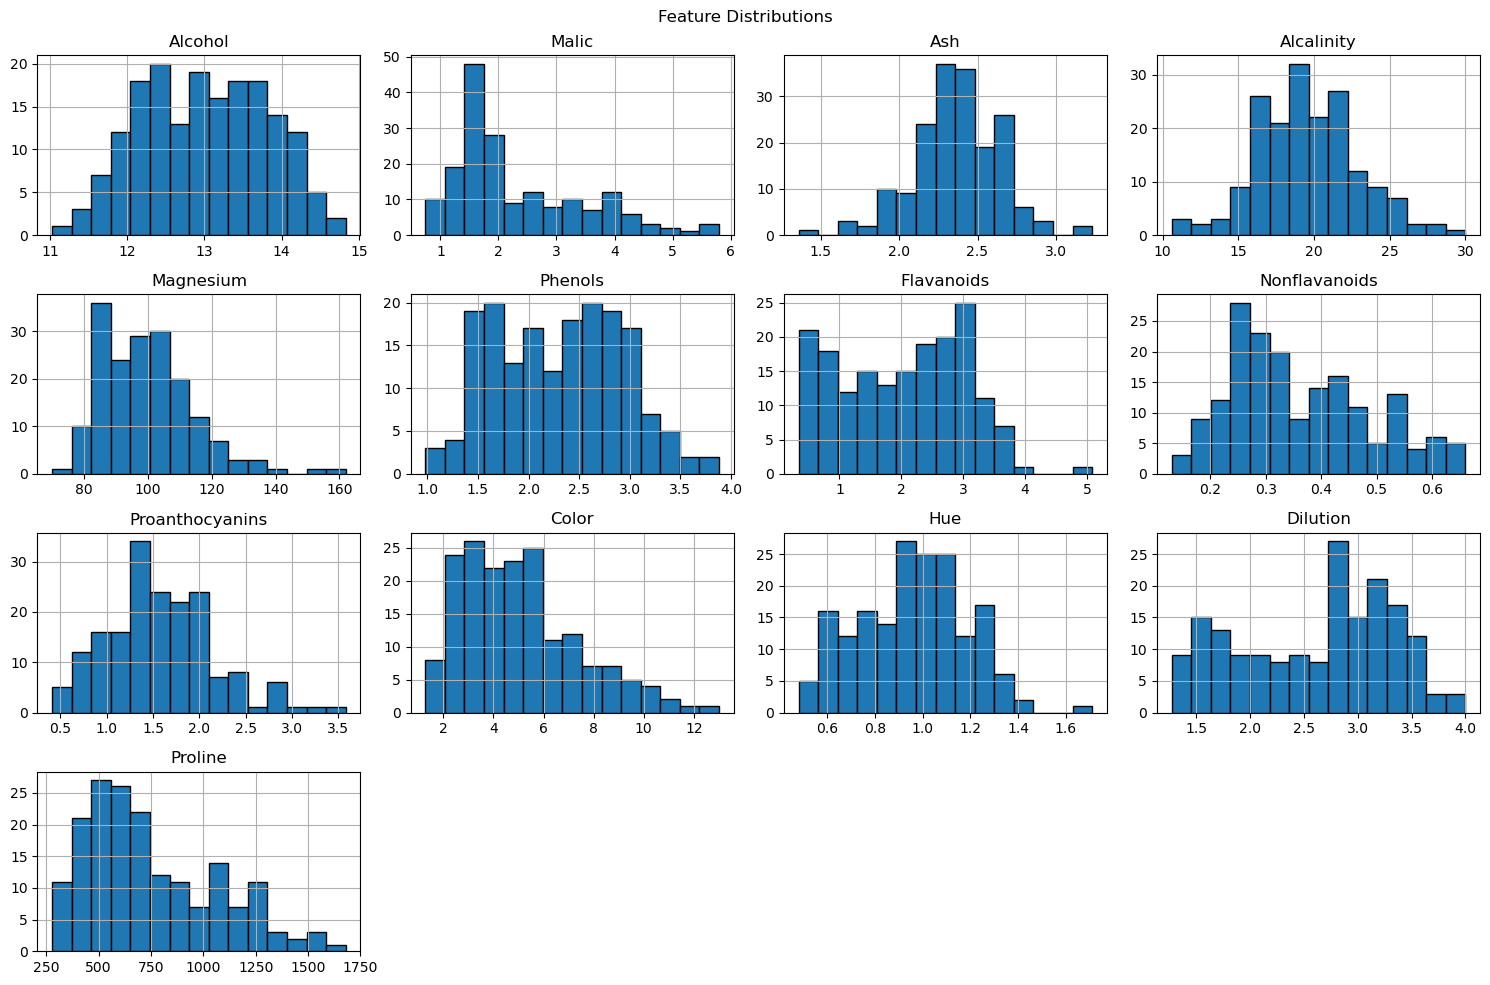

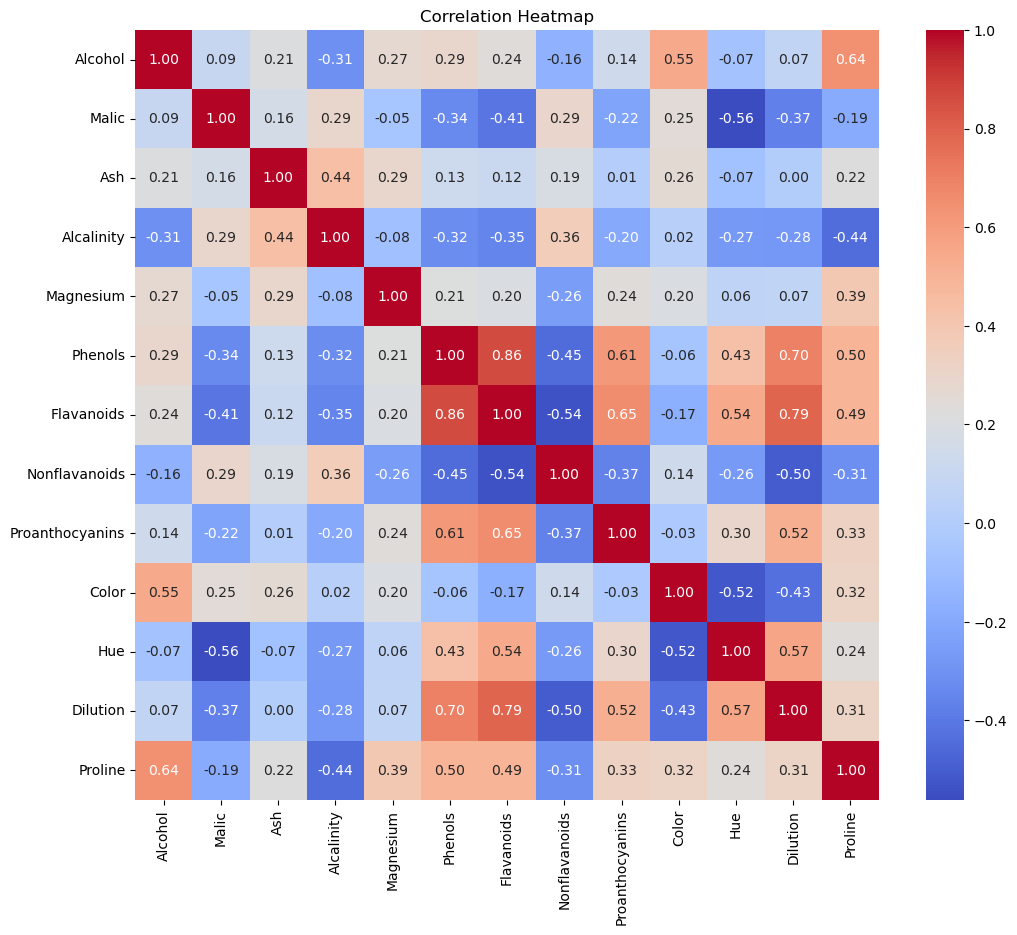

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine_df = pd.read_csv("wine.csv")

# Display basic information
print(wine_df.info())
print(wine_df.describe())

# Drop the label column for feature analysis
features = wine_df.drop("Type", axis=1)

# Plot histograms
features.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Task 2: Dimensionality Reduction with PCA

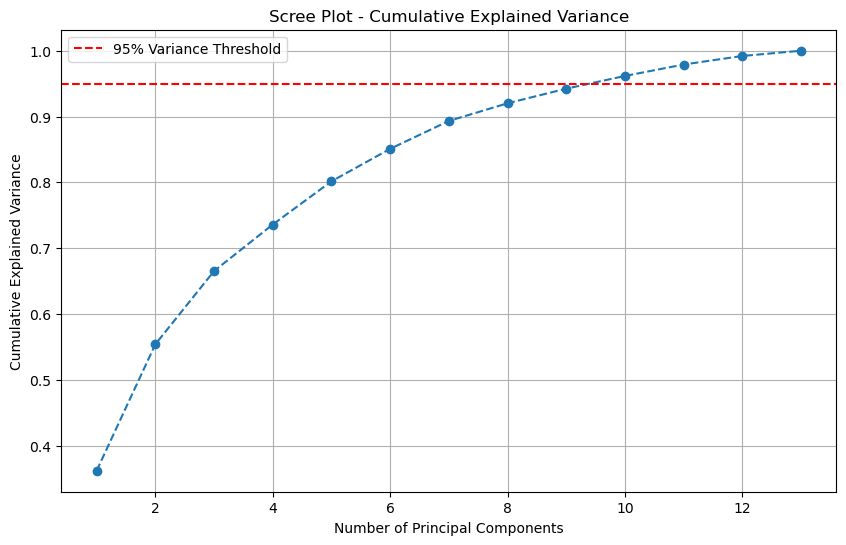

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Select top 7 components
pca_final = PCA(n_components=7)
X_pca_7 = pca_final.fit_transform(X_scaled)

# Create DataFrame
pca_columns = [f'PC{i+1}' for i in range(7)]
pca_df = pd.DataFrame(X_pca_7, columns=pca_columns)
pca_df['Type'] = wine_df['Type']

Task 3: Clustering with Original Data

C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Original Data:
Silhouette Score: 0.285
Davies-Bouldin Index: 1.389


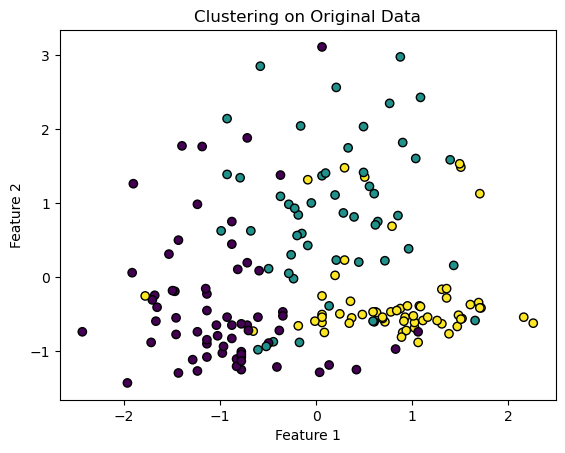

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Clustering on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
y_pred_orig = kmeans_orig.fit_predict(X_scaled)

# Metrics
silhouette_orig = silhouette_score(X_scaled, y_pred_orig)
davies_orig = davies_bouldin_score(X_scaled, y_pred_orig)
print("Original Data:")
print(f"Silhouette Score: {silhouette_orig:.3f}")
print(f"Davies-Bouldin Index: {davies_orig:.3f}")

# Plotting clusters (first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_orig, cmap='viridis', edgecolor='k')
plt.title("Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Task 4: Clustering with PCA Data

C:\Users\sschp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PCA Data:
Silhouette Score: 0.328
Davies-Bouldin Index: 1.221


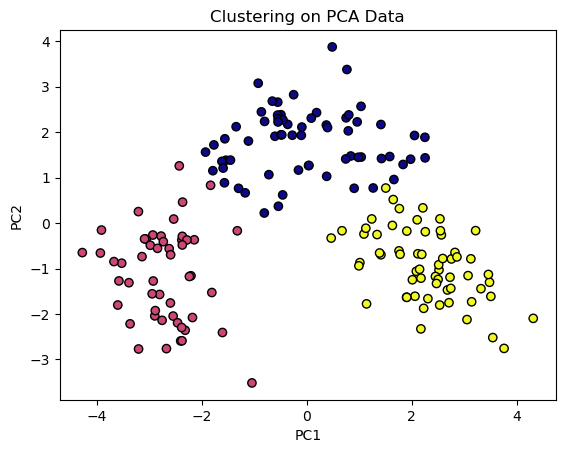

In [4]:
# Clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_pred_pca = kmeans_pca.fit_predict(X_pca_7)

# Metrics
silhouette_pca = silhouette_score(X_pca_7, y_pred_pca)
davies_pca = davies_bouldin_score(X_pca_7, y_pred_pca)
print("PCA Data:")
print(f"Silhouette Score: {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index: {davies_pca:.3f}")

# Plotting clusters (first two PCs)
plt.scatter(X_pca_7[:, 0], X_pca_7[:, 1], c=y_pred_pca, cmap='plasma', edgecolor='k')
plt.title("Clustering on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Task 5: Comparison and Analysis
1.Clustering Performance:

Original Data: Silhouette Score = silhouette_orig, DB Index = davies_orig
PCA Data: Silhouette Score = silhouette_pca, DB Index = davies_pca
Higher silhouette and lower DB Index indicate better clustering performance.

2.Similarities and Differences:

The clusters in both approaches identify similar groupings overall.
PCA-based clustering may show more compact clusters visually but may blur boundaries if key features are lost.

3.Impact of Dimensionality Reduction:
PCA reduces noise and removes correlated features, often resulting in better-separated clusters.
However, PCA may obscure certain distinctions if those distinctions are not along the most varying dimensions.

4.Trade-offs:
PCA Pros: Simpler, faster clustering; improved visualizations; reduced overfitting.
PCA Cons: Potential loss of interpretability and subtle structure.
Original Pros: Retains full data richness.
Original Cons: High dimensionality may reduce clustering efficiency and introduce noise.

Task 6: Conclusion and Insights

1.Key Findings:
PCA effectively reduced dimensionality while retaining over 95% of variance with 7 components.
Clustering on PCA-transformed data slightly outperformed clustering on the original data in terms of Silhouette Score and Davies-Bouldin Index.
Visual inspection showed clearer cluster separation using PCA components.

2.Practical Implications:
PCA is valuable for preprocessing in high-dimensional datasets by improving algorithm performance and reducing computational load.
Clustering, when combined with PCA, can yield better grouping and visualization, especially in noisy or highly correlated datasets.

3.Recommendations:
Use PCA before clustering when:
Dataset has many correlated or irrelevant features
Visualization of clusters in 2D/3D is important
Performance and speed are priorities

Avoid PCA if:
Feature interpretability is critical
Original feature space holds essential non-linear patterns not captured by PCA